In [1]:
%load_ext autoreload
%autoreload 2

In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import yaml

from typing import List, Dict, Any
from pathlib import Path


# local imports
from src.data_processing.model_analyzers.elastic_net_analyzers.elastic_net_analyzer import MetricAnalyzer, FeatureImportanceAnalyzer
from src.data_processing.model_analyzers.elastic_net_analyzers.path_finder import PathFinder

# Dopamine Only


da_only_path = '/projects/p31961/ENIGMA/results/experiments/endpoint_experiments/xgb_regression_da_only_hyperopt_tune_no_reg'
da_experimenter = XGBRegExperimenter(da_only_path, analyzer=XGBRegAnalyzer, results = XGBRegrResults)
da_experimenter.run_experiment(
    number_of_runs=20, cls_to_drop=['mouse_id', 'day'])

da_w_day_experimenter = XGBRegExperimenter(
    da_only_path, analyzer=XGBRegAnalyzer, results=XGBRegrResults)
da_w_day_experimenter.run_experiment(
    number_of_runs=20, cls_to_drop=['mouse_id'])

# analyzer.fit_best_xgb_model()
# analyzer.plot_model_results()
# 

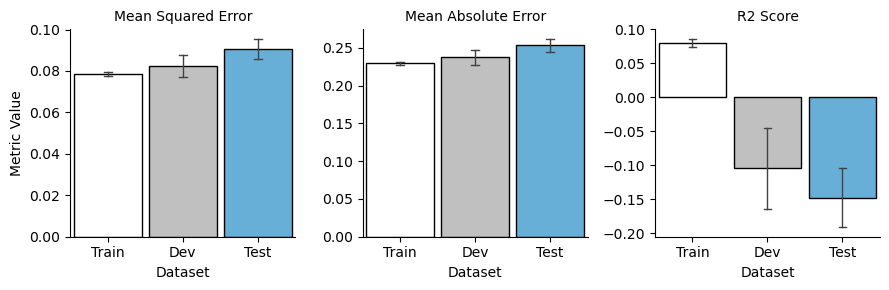

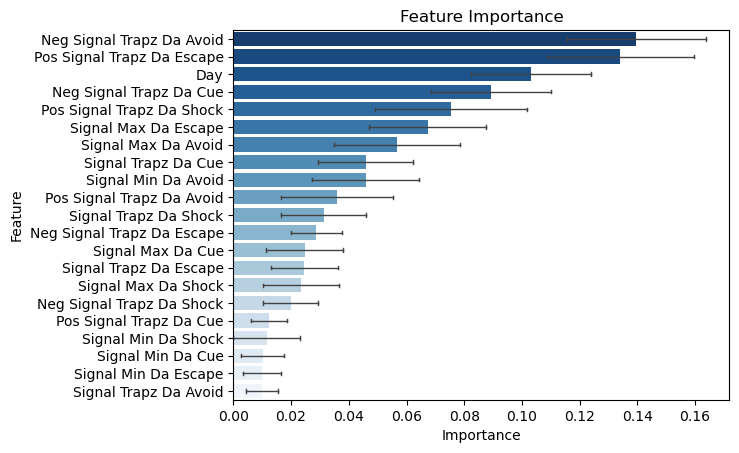

,feature,importance,data_cat,with_day,is_net
20,Signal Trapz Da Shock,0.000000,feature_importance_results,True,False
15,Signal Min Da Escape,0.000000,feature_importance_results,True,False
12,Signal Max Da Shock,0.000000,feature_importance_results,True,False
18,Signal Trapz Da Cue,0.000000,feature_importance_results,True,False
19,Signal Trapz Da Escape,0.000000,feature_importance_results,True,False
...,...,...,...,...,...
11,Signal Max Da Escape,0.056712,feature_importance_results,True,False
6,Pos Signal Trapz Da Cue,0.145610,feature_importance_results,True,False
7,Pos Signal Trapz Da Escape,0.162751,feature_importance_results,True,False
1,Neg Signal Trapz Da Avoid,0.194834,feature_importance_results,True,False


In [53]:
def analyze_and_plot_results(path:str):
    path = Path(path)
    path_finder = PathFinder(path)

    
    metrics_path = path_finder.metrics_paths[0]
    feature_path = path_finder.feature_importance_paths[0]
    feature_analyzer = FeatureImportanceAnalyzer(feature_path)
    net_analyzer = MetricAnalyzer(metrics_path)
    net_analyzer.read_and_clean_data()
    net_analyzer.plot_data()
    plt.show()
    feature_analyzer.read_and_clean_data()
    feature_analyzer.plot_data()
    plt.show()
    
    return feature_analyzer.data_frame


da_path = '/Users/mds8301/Development/ENIGMA/results/experiments/endpoint_experiments/xgb_regression_da_only_hyperopt_tune_no_reg/xgb_regression_da_only_hyperopt_elastic_net'

analyze_and_plot_results(da_path)

# DA and D1

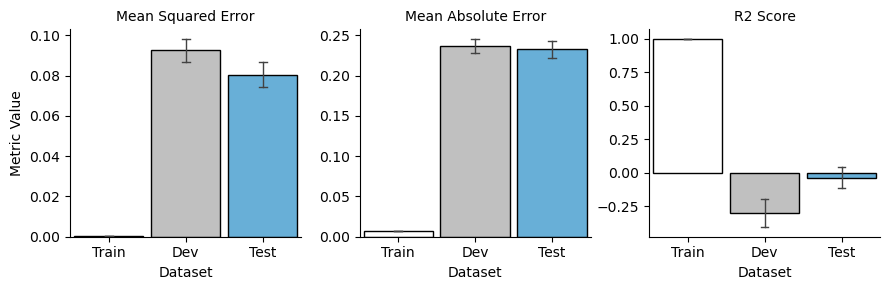

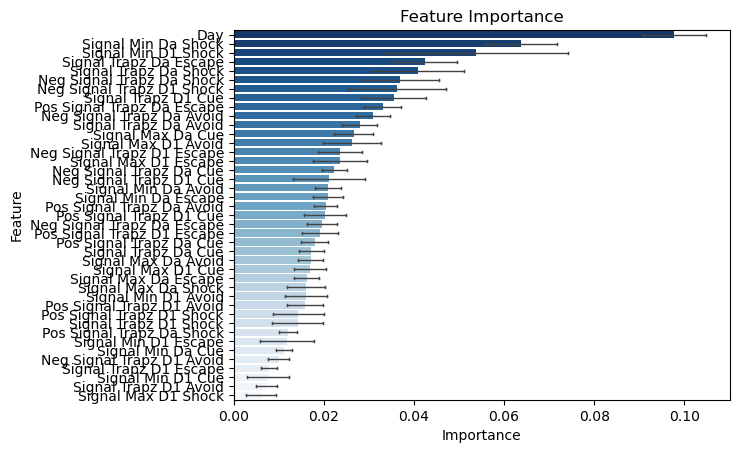

,feature,importance,data_cat,with_day,is_net
20,Signal Max D1 Shock,0.000000,feature_importance_results,True,False
12,Pos Signal Trapz D1 Shock,0.000000,feature_importance_results,True,False
26,Signal Min D1 Cue,0.000000,feature_importance_results,True,False
25,Signal Min D1 Avoid,0.000034,feature_importance_results,True,False
27,Signal Min D1 Escape,0.000079,feature_importance_results,True,False
...,...,...,...,...,...
23,Signal Max Da Escape,0.047259,feature_importance_results,True,False
28,Signal Min D1 Shock,0.059594,feature_importance_results,True,False
4,Neg Signal Trapz D1 Shock,0.098064,feature_importance_results,True,False
0,Day,0.156911,feature_importance_results,True,False


In [60]:
da_d1_path = '/Users/mds8301/Development/ENIGMA/results/experiments/endpoint_experiments/xgb_regression_da_and_d1_only_hyperopt_tune_no_reg/xgb_regression_da_and_d1_elastic_net'
analyze_and_plot_results(da_d1_path)

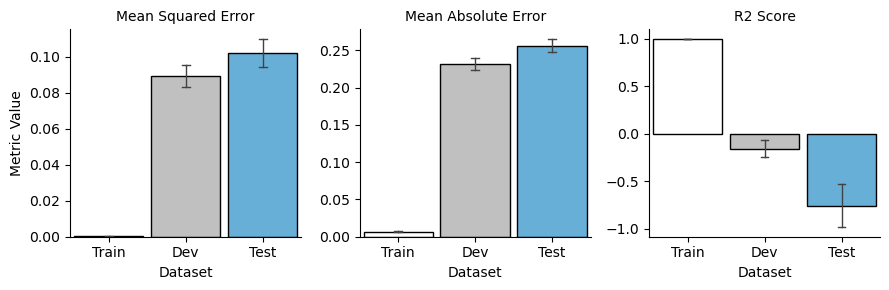

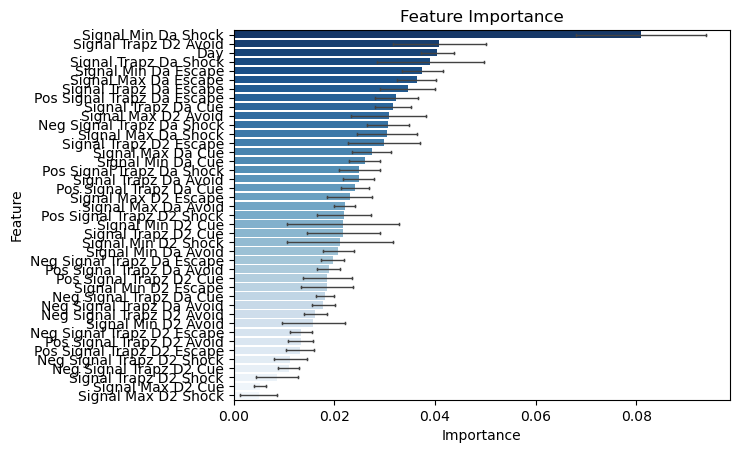

,feature,importance,data_cat,with_day,is_net
20,Signal Max D2 Shock,0.000000,feature_importance_results,True,False
18,Signal Max D2 Cue,0.000000,feature_importance_results,True,False
26,Signal Min D2 Cue,0.000000,feature_importance_results,True,False
36,Signal Trapz D2 Shock,0.000000,feature_importance_results,True,False
19,Signal Max D2 Escape,0.000000,feature_importance_results,True,False
...,...,...,...,...,...
14,Pos Signal Trapz Da Cue,0.054330,feature_importance_results,True,False
31,Signal Min Da Escape,0.056263,feature_importance_results,True,False
34,Signal Trapz D2 Cue,0.058085,feature_importance_results,True,False
30,Signal Min Da Cue,0.060655,feature_importance_results,True,False


In [59]:
da_d2_path = '/Users/mds8301/Development/ENIGMA/results/experiments/endpoint_experiments/xgb_regression_da_and_d2_only_hyperopt_tune_no_reg/with_day_experiment_results'
analyze_and_plot_results(da_d2_path)